<a href="https://colab.research.google.com/github/Khushal17ad/d2i/blob/master/lecture_2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Probability

In [1]:
!pip install -U d2l

     |████████████████████████████████| 61kB 1.7MB/s 


### Basic Probability Theory

In [2]:
%matplotlib inline
from d2l import torch as d2l
import torch
from torch.distributions import multinomial

In [8]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [11]:
multinomial.Multinomial(1000, fair_probs).sample()

tensor([171., 165., 160., 164., 172., 168.])

In [12]:
# Store the results as 32-bit floats for division
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # Relative frequency as the estimate

tensor([0.1540, 0.1670, 0.1750, 0.1730, 0.1790, 0.1520])

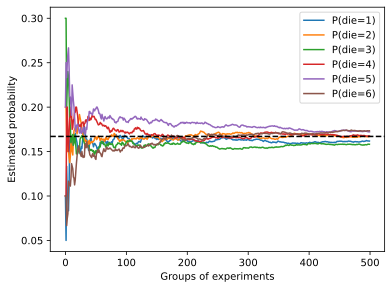

In [33]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
    
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()